#### Import necessary Libraries and Read Loan Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("loan.csv")

C:\Users\HELLO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Understansing the layout of the data

In [3]:
print(loan.info())
print(loan.shape)
loan.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## About Lending Club:
####    LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission(SEC). Lending Club enables borrowers to create unsecured personal loans between 1,000 dollars and 40,000 dollars. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

## Problem Statement:
#### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 
#### If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

#### Status of the loan was given in the problem statement.  Lets look into it.

In [4]:
print(loan['loan_status'].describe())
print(loan['loan_status'].unique())

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object
['Fully Paid' 'Charged Off' 'Current']


#### Loan Status variable consists of values. Fully Paid, Charged Off and Current. We are going to remove "Current" because we can't possibly know at this time whether it will be fully paid or charged off.

In [5]:
loan = loan[loan['loan_status']!= 'Current']
loan.to_csv("Loan Status.csv")

## Understanding the variables:

## 1) Customer Related Variables:
##### emp_title 
##### emp_length
##### home_ownership
##### annual_inc
##### verification_status
##### addr_state
##### zip_code
##### title
##### purpose
##### desc
##### url

## 2)  Loan Related Information:
##### loan_amnt
##### funded_amnt
##### funded_amnt_inv(invested amount)
##### int_rate (interest rate)
##### loan_status
##### grade
##### sub-grade
##### dti (debt to income ratio)
##### issue_d (loan issue date)
##### term (loan-term)
##### installment


## 3) Variables on the response from the Customers and actions taken by the customers:


### delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m	mths_since_rcnt_il	total_bal_il	il_util	open_rv_12m	open_rv_24m	max_bal_bc	all_util	total_rev_hi_lim	inq_fi	total_cu_tl	inq_last_12m	acc_open_past_24mths	avg_cur_bal	bc_open_to_buy	bc_util	chargeoff_within_12_mths	delinq_amnt	mo_sin_old_il_acct	mo_sin_old_rev_tl_op	mo_sin_rcnt_rev_tl_op	mo_sin_rcnt_tl	mort_acc	mths_since_recent_bc	mths_since_recent_bc_dlq	mths_since_recent_inq	mths_since_recent_revol_delinq	num_accts_ever_120_pd	num_actv_bc_tl	num_actv_rev_tl	num_bc_sats	num_bc_tl	num_il_tl	num_op_rev_tl	num_rev_accts	num_rev_tl_bal_gt_0	num_sats	num_tl_120dpd_2m	num_tl_30dpd	num_tl_90g_dpd_24m	num_tl_op_past_12m	pct_tl_nvr_dlq	percent_bc_gt_75	pub_rec_bankruptcies	tax_liens	tot_hi_cred_lim	total_bal_ex_mort	total_bc_limit	total_il_high_credit_limit


### Removing Columns from the dataframe.

#### 1) As the variables in the 3rd catergory from above won't be avialable during the lending process of loans, analyzing these variables would be waste of time. So we are going to remove these variables.

#### 2) Removing paymt plan because it contains only one value.

#### 3) Removing desc as we are not going to do any anlysis on those text.

#### 4) Removing url,id and member_id from the table as we are not interested in the individuals data. Rather,  we are focusing on the data of a group.

#### Since the number of columns we are going to remove are larger than the number of columns we are interested to analyze, I am just going to take a copy of the columns that we are interested to analyze in a new dataframe

In [6]:
loan_final = loan[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','title','zip_code','addr_state','dti']]
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
int_rate               38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_title              36191 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
title                  38566 non-null object
zip_code               38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-nu

In [7]:
print(loan_final['emp_title'].describe())
print(loan_final['title'].describe())
print(loan_final['zip_code'].describe())
print(loan_final['addr_state'].describe())
print(loan_final['sub_grade'].describe())

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object
count                  38566
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object
count     38577
unique      822
top       100xx
freq        583
Name: zip_code, dtype: object
count     38577
unique       50
top          CA
freq       6949
Name: addr_state, dtype: object
count     38577
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object


#### As the columns emp_title,title, addr_state,zip_code,sub_grade have huge number of unique columns, they can't be used as a category. So removing these columns also.

In [8]:
loan_final.drop(['emp_title','title','zip_code','addr_state','sub_grade'],axis=1,inplace=True)
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
int_rate               38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
dti                    38577 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 4.7+ MB


C:\Users\HELLO\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Data Cleaning and Formatting:


In [9]:
### The interest rate column is string. Lets convert this to numeric which can be done by removing the '%'at the end.
loan_final['int_rate'].describe()
def int_rates_to_number(x):
    y =x.split('%')
    return y[0]
loan_final['interest'] = loan_final['int_rate'].apply(int_rates_to_number)
loan_final['interest'] = pd.to_numeric(loan_final['interest'])
loan_final.drop('int_rate',inplace=True,axis=1)
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
dti                    38577 non-null float64
interest               38577 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 4.7+ MB


C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\HELLO\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Analyzing and Formatting the Issue_d variable

In [11]:
print(loan_final['issue_d'].sort_values(ascending=False).head(10))
### The date is given as string in "dd-Month" Format
from datetime import datetime
def string_to_datetime(x):
    try:
        y = datetime.strptime(x,'%b-%d')
        z = y.month
        return z
    except TypeError:
        return None
loan_final['issue_d'] = loan_final['issue_d'].apply(string_to_datetime)
loan_final['issue_d'].describe()

7925    Sep-11
7239    Sep-11
7221    Sep-11
7222    Sep-11
8798    Sep-11
7224    Sep-11
7225    Sep-11
7226    Sep-11
7227    Sep-11
8801    Sep-11
Name: issue_d, dtype: object


C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


count    38577.000000
mean         7.114757
std          3.408523
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: issue_d, dtype: float64

In [13]:
loan_final['issue_d'] = loan_final['issue_d'].apply(lambda x : str(x))
loan_final['issue_d'].describe()

C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count     38577
unique       12
top          12
freq       4215
Name: issue_d, dtype: object

#### Lets plot the loan status to get an idea of what percentage of applicants have defaulted on their loan.

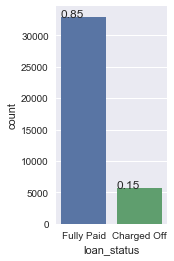

In [14]:
sns.set(rc={'figure.figsize':(2,4)})
total = float(len(loan_final['loan_status']))
ax = sns.countplot(x='loan_status',data=loan_final)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="right")
plt.show()

#### Lets create a new column called Charged_Off with values 1 and 0. 1 if loan_status is charged off. It will useful to take the sum of this column during univariate analysis

In [15]:
loan_final['Charged Off'] = loan_final['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan_final['Charged Off'].describe()

C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Charged Off, dtype: float64

#### From above, mean gives the percentage of loan that have been charged off which is 14.58%. In the previous plot, we saw that the percentage was 15% which is because the value was rounded off.

# Univariate Analysis and Bivariate Analysis:

### Lets begin univariate analysis by plotting the distribution of different numerical variables

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

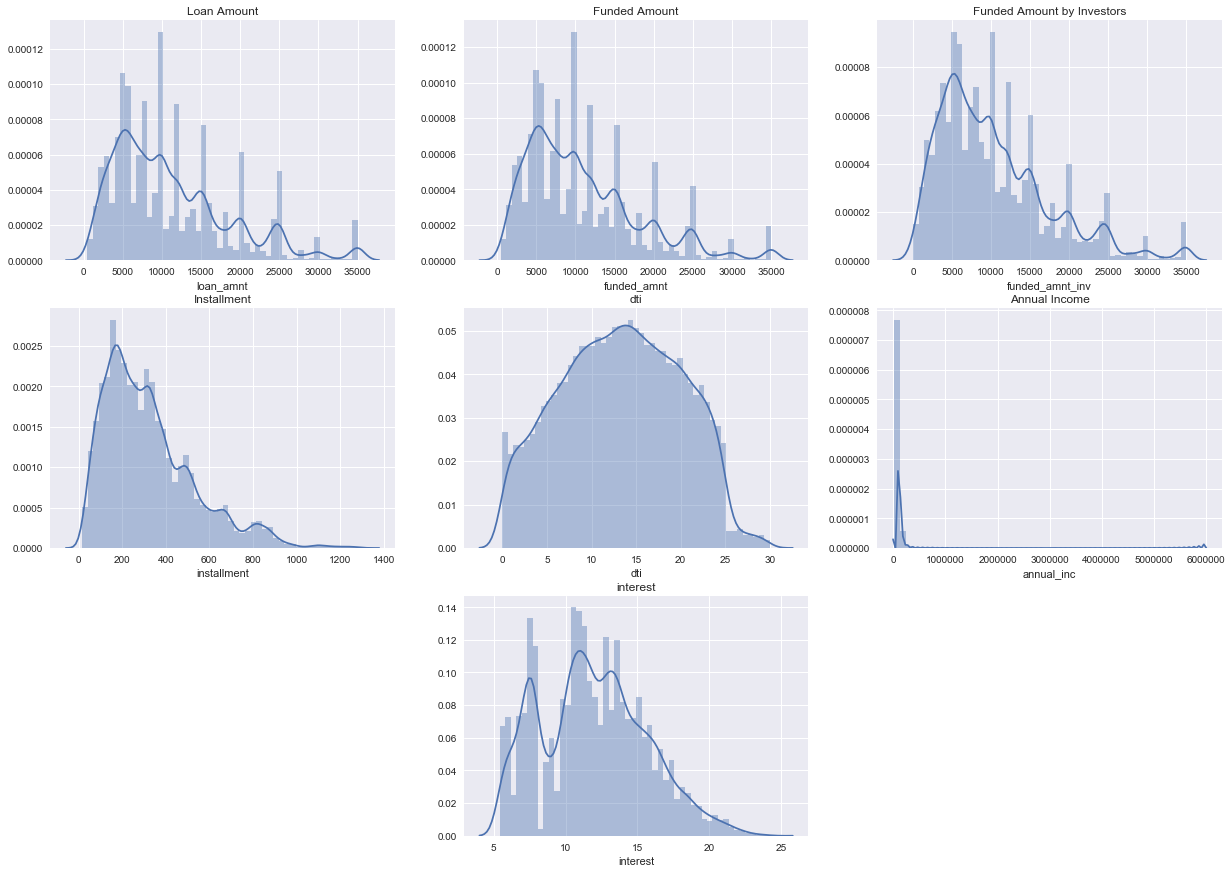

In [16]:
# subplot 1
sns.set(rc={'figure.figsize':(21,15)})
plt.subplot(3, 3, 1)
plt.title('Loan Amount')
sns.distplot(loan_final['loan_amnt'])

# subplot 2
plt.subplot(3, 3, 2)
plt.title('Funded Amount')
sns.distplot(loan_final['funded_amnt'])


# subplot 3
plt.subplot(3, 3, 3)
plt.title('Funded Amount by Investors')
sns.distplot(loan_final['funded_amnt_inv'])

# subplot 4
plt.subplot(3, 3, 4)
plt.title('Installment')
sns.distplot(loan_final['installment'])

# subplot 5
plt.subplot(3, 3, 5)
plt.title('dti')
sns.distplot(loan_final['dti'])

# subplot 6
plt.subplot(3, 3, 6)
plt.title('Annual Income')
sns.distplot(loan_final['annual_inc'])

# subplot 8
plt.subplot(3, 3, 8)
plt.title('interest')
sns.distplot(loan_final['interest'])

plt.show()

#### From the above distribution,
#### 1. We see that Loan-amount, funded_amount, fundedamount_investors and Installment follow the similar pattern. 
#### 2. Debt to Income Ratio(DTI) for most of the applicant is between 10 and 20.
#### 3. Most of Applicants have annual income less than 1000000.

### Lets understand more about these variables by finding the correlation between the variables.

In [17]:
# Lets find out the correlation between these variables

corr = loan_final.corr()
print(corr)
corr.to_csv("Corr.csv")

                 loan_amnt  funded_amnt  funded_amnt_inv  installment  \
loan_amnt         1.000000     0.981790         0.937922     0.932260   
funded_amnt       0.981790     1.000000         0.956172     0.958035   
funded_amnt_inv   0.937922     0.956172         1.000000     0.905464   
installment       0.932260     0.958035         0.905464     1.000000   
annual_inc        0.268999     0.264798         0.251981     0.267842   
dti               0.062436     0.062194         0.070663     0.052038   
interest          0.301265     0.304930         0.297473     0.277203   
Charged Off       0.059463     0.056497         0.037781     0.027153   

                 annual_inc       dti  interest  Charged Off  
loan_amnt          0.268999  0.062436  0.301265     0.059463  
funded_amnt        0.264798  0.062194  0.304930     0.056497  
funded_amnt_inv    0.251981  0.070663  0.297473     0.037781  
installment        0.267842  0.052038  0.277203     0.027153  
annual_inc         1.000000

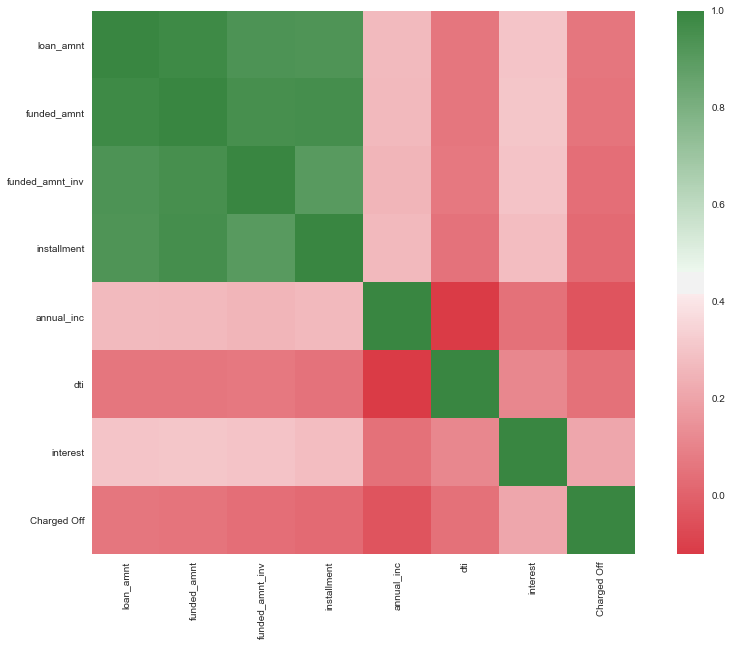

In [18]:
import seaborn as sns
import matplotlib.pyplot as pl
f, ax = pl.subplots(figsize=(15, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 130, as_cmap=True),
            square=True, ax=ax)

#### We can draw below conclusions from the above figure and table.

##### 1. Loan_amnt, funded_amnt and funded_amnt_inv  and installment are highly correlated which makes sense because most of the loans are funded fully and are from investors. Also, the higher the loan the installment will be high too.

##### 2. Loan-amnt has 27% correlation with the annual income and 30% correlation with interest

##### 3. DTI has negative correlation with annual income which is expected as the applicants having higher income will have low dti ratio

In [19]:
#### Lets create bins for numerical values. So that we can use this for analysis.
### We know how the loan_amount is ditributed, so lets create bin for Loan_amount
def loan_bin(x):
    if x<=5000:
        return "Small"
    elif x>5000 and x<=20000:
        return "Medium"
    else:
        return "High"
loan_final['loan_bin'] = loan_final['loan_amnt'].apply(loan_bin)
loan_final['loan_bin'].describe()

C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


count      38577
unique         3
top       Medium
freq       24834
Name: loan_bin, dtype: object

In [20]:
# Since funded_amount and funded_amnt_inv are highly correlated with loan_amnt, lets not create bin for those. We will create bin for interest rate, installment and dti
#### Lets create bins for numerical values. So that we can use this for analysis.
### Bin for Installment
def installment_bin(x):
    if x<=200:
        return "Small"
    elif x>200 and x<=400:
        return "Medium"
    else:
        return "High"
loan_final['installment_bin'] = loan_final['installment'].apply(installment_bin)
print(loan_final['installment_bin'].describe())

### Bin for DTI
def dti_bin(x):
    if x<=10:
        return "Small"
    elif x>10 and x<=20:
        return "Medium"
    else:
        return "High"
loan_final['dti_bin'] = loan_final['dti'].apply(dti_bin)
print(loan_final['dti_bin'].describe())


count      38577
unique         3
top       Medium
freq       14732
Name: installment_bin, dtype: object
count      38577
unique         3
top       Medium
freq       18441
Name: dti_bin, dtype: object


C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
#### Since we clearly have outlier for annual income, lets describe and create bins using the quantile. Lets do the same for interest also
print(loan_final['annual_inc'].describe())
print(loan_final['interest'].describe())

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: interest, dtype: float64


In [22]:
### Bin for Annual Income
def income_bin(x):
    if x<=41000:
        return "Small"
    elif x>41000 and x<=82000:
        return "Medium"
    else:
        return "High"
loan_final['income_bin'] = loan_final['annual_inc'].apply(income_bin)
print(loan_final['income_bin'].describe())

### Bin for Interest
def interest_bin(x):
    if x<=9:
        return "Small"
    elif x>9 and x<=14:
        return "Medium"
    else:
        return "High"
loan_final['interest_bin'] = loan_final['interest'].apply(interest_bin)
print(loan_final['interest_bin'].describe())

count      38577
unique         3
top       Medium
freq       18989
Name: income_bin, dtype: object
count      38577
unique         3
top       Medium
freq       18112
Name: interest_bin, dtype: object


C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Lets see if we can create bins for any of the other variables in the dataframe

In [23]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
dti                    38577 non-null float64
interest               38577 non-null float64
Charged Off            38577 non-null int64
loan_bin               38577 non-null object
installment_bin        38577 non-null object
dti_bin                38577 non-null object
income_bin             38577 non-n

In [24]:
# There is column named emp_length which states the experience of the borrower
loan_final['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [25]:
#lets create a bin emp_length as well
def emp_length_bin(x):
    if x in ['< 1 year','1 year','2 years','3 years','4 years']:
        return "Entry Level"
    elif x in ['5 years','6 years','7 years','8 years','9 years']:
        return "Intermediate"
    else:
        return "Senior"
loan_final['emp_length_bin'] = loan_final['emp_length'].apply(emp_length_bin)
print(loan_final['emp_length_bin'].describe())

count           38577
unique              3
top       Entry Level
freq            19322
Name: emp_length_bin, dtype: object


C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
dti                    38577 non-null float64
interest               38577 non-null float64
Charged Off            38577 non-null int64
loan_bin               38577 non-null object
installment_bin        38577 non-null object
dti_bin                38577 non-null object
income_bin             38577 non-n

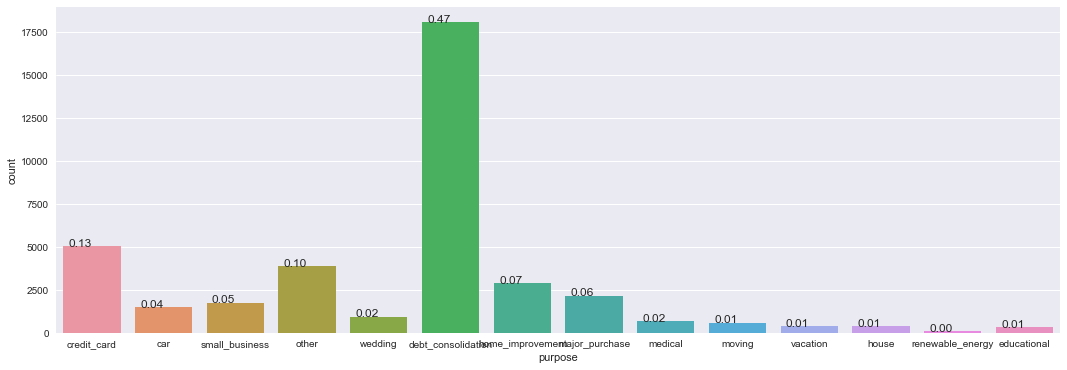

In [27]:
# We will start what percenatge of loans are distributed among its type.
sns.set(rc={'figure.figsize':(18,6)})
total = float(len(loan_final['purpose']))
ax = sns.countplot(x='purpose',data=loan_final)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="right")
plt.show()

### It is clear from the graph that five lone types which are mostly used by the applicant are

### 1. Debt Consolidation

### 2. Credit Card

### 3. Other

### 4. Home imporvement

### 5. Major Purchase

#### Lets just concentarte on these types of loan and find out the variables having significance over default rate on each of these loans

In [28]:
loan_final = loan_final[loan_final['purpose'].isin(['credit_card','other','debt_consolidation','home_improvement','major_purchase'])]

In [29]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31972 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt              31972 non-null int64
funded_amnt            31972 non-null int64
funded_amnt_inv        31972 non-null float64
term                   31972 non-null object
installment            31972 non-null float64
grade                  31972 non-null object
emp_length             31152 non-null object
home_ownership         31972 non-null object
annual_inc             31972 non-null float64
verification_status    31972 non-null object
issue_d                31972 non-null object
loan_status            31972 non-null object
purpose                31972 non-null object
dti                    31972 non-null float64
interest               31972 non-null float64
Charged Off            31972 non-null int64
loan_bin               31972 non-null object
installment_bin        31972 non-null object
dti_bin                31972 non-null object
income_bin             31972 non-n

#### We have only on two ordered categorical column "Grade" and "Emp Length". Lets understand its relationship with some of the numerical variables.

In [30]:
loan_group = loan_final.groupby('grade')['interest','installment','loan_amnt','annual_inc','dti'].mean()
#loan_group.set_index('purpose')
loan_group

,interest,installment,loan_amnt,annual_inc,dti
grade,,,,,
A,7.333656,265.733773,8903.280404,67045.745048,12.349850
B,11.024236,330.386040,11274.405925,67590.046227,13.745127
C,13.539212,326.232803,11086.450730,67946.161510,14.180900
D,15.667572,371.903805,12425.952325,68342.348004,14.285688
E,17.698432,441.795632,16240.871416,78694.481962,14.541832
F,19.684778,513.546281,18883.282020,84730.146059,14.774470
G,21.454693,601.178991,21375.109649,98109.767193,14.756754


#### From above table it is clear that as Grade increases from A to B, interest rate and installment amount increase. So Grade is higly correlated wtih these two columns. But we don't see the patterns for any of the other columns. So considering only one variable "Grade" instead of three for determining the default_rate.

In [31]:
# Relation of emp_length with various numerical variables
loan_group1 = loan_final.groupby('emp_length')['interest','installment','loan_amnt','annual_inc','dti'].mean()
#loan_group.set_index('purpose')
loan_group1

,interest,installment,loan_amnt,annual_inc,dti
emp_length,,,,,
1 year,12.019207,312.039539,10412.939453,63553.861188,13.469793
10+ years,12.049113,374.933401,13203.350551,81491.493647,13.912163
2 years,12.013198,310.682966,10370.407586,62888.482502,13.367504
3 years,12.050894,321.628143,10911.992986,66876.857319,13.676313
4 years,12.105229,328.835892,11138.509825,66315.704851,13.544731
5 years,12.007421,334.547508,11467.807315,68598.614076,13.784778
6 years,12.031876,337.077005,11664.947888,67546.193291,14.183961
7 years,12.070752,346.664729,11825.017569,68682.749213,13.984378
8 years,11.846634,350.965911,12086.658456,75197.650977,14.171412


#### We don't see any patterns here so we are going to ignore it

## Now that we have created the bins for all the numeric variables, understood the relationship of numerical variables with ordered categorical data and identified the most popular loan types, we can now understand the relationship of each of the categorical variables with Loan Status. 

#### Note: Bins which was created for numerical values will also be considered categorical

#### Adding all the categories in a list to make it easier.

In [32]:
category_list =['term','grade','home_ownership','verification_status','loan_bin','dti_bin','income_bin','emp_length_bin']

In [33]:
###  Create a function for Finding Categorical Weighted Default Rate

def find_categorical_weighted_average(data1,category):
    group_category_count = pd.DataFrame({"Total Count": data1.groupby(category).size()}).reset_index()
    group_category_default_rate = pd.DataFrame({"Default count": data1.groupby(category)['Charged Off'].sum()}).reset_index()
    
    Merged_df = group_category_count.merge(group_category_default_rate)
    Merged_df['Weighted Default Rate'] = Merged_df['Default count'] * (Merged_df['Default count']/Merged_df['Total Count'])
    
    total_default_count = Merged_df['Default count'].sum()
    
    Merged_df['Weighted Default Rate'] = Merged_df['Weighted Default Rate']/total_default_count    
    return Merged_df['Weighted Default Rate'].sum()



In [34]:
#### Lets create a plotting function to plot the default rate
def plot_bar(data1,name):
    y = "Loan Default Rate based of "+name
    sns.set(rc={'figure.figsize':(8,6)})
    plt.title(y)
    sns.barplot(x='Category',y='Default Rate',data=data1)
    plt.yscale('log')

    plt.show()

In [35]:
loan_final['purpose'].unique()

array(['credit_card', 'other', 'debt_consolidation', 'home_improvement',
       'major_purchase'], dtype=object)

In [36]:
#### Cedit Card Loan Type: Default Rate

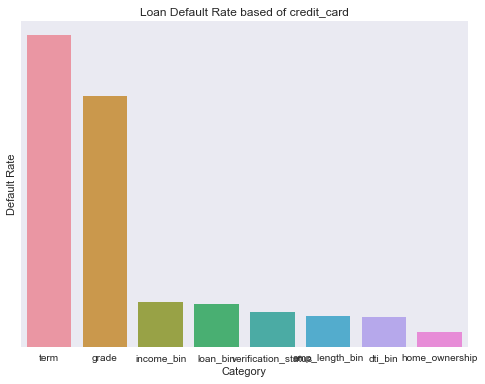

In [37]:
credit_card = loan_final[loan_final['purpose'] == 'credit_card']

credit_card_default_rate = {}

for i in category_list:
    weighted_average = find_categorical_weighted_average(credit_card,i)
    credit_card_default_rate[i] =  weighted_average
    
credit_card_default_rate_df = pd.DataFrame.from_dict(credit_card_default_rate,orient="index",columns=["rate"]).reset_index()
credit_card_default_rate_df.sort_values(by='rate',ascending=False,inplace=True)
credit_card_default_rate_df.columns=['Category','Default Rate']
credit_card_default_rate_df
plot_bar(credit_card_default_rate_df,"credit_card")

Credit Card Loan - Important Variables:
    1. Term
    2. Grade
    3. Annual Income Bin
    4. Loan Bin

In [38]:
#### Other Loan Type: Default Rate

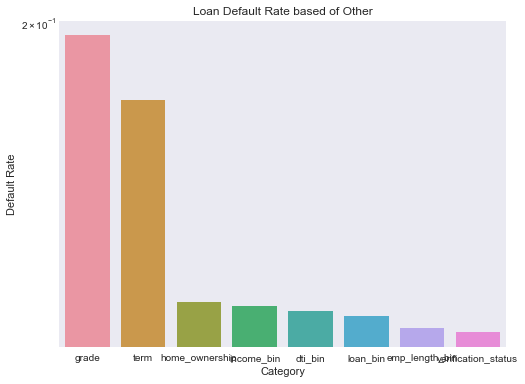

In [39]:
Other = loan_final[loan_final['purpose'] == 'other']

Other_default_rate = {}

for i in category_list:
    weighted_average = find_categorical_weighted_average(Other,i)
    Other_default_rate[i] =  weighted_average
    
Other_default_rate_df = pd.DataFrame.from_dict(Other_default_rate,orient="index",columns=["rate"]).reset_index()
Other_default_rate_df.sort_values(by='rate',ascending=False,inplace=True)
Other_default_rate_df.columns=['Category','Default Rate']

plot_bar(Other_default_rate_df,"Other")

Other Loan - Important Variables:
    1. Grade
    2. Term
    3. Home Ownership
    4. Income Bin

In [40]:
#### Debt Consolidation Loan Type: Default Rate

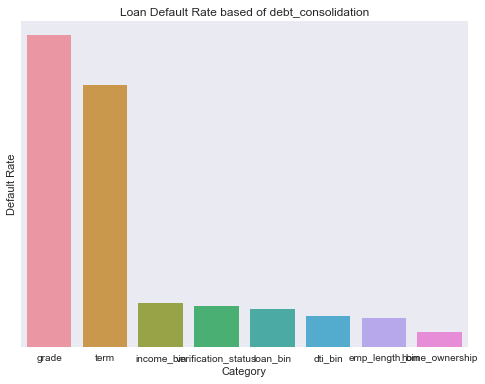

In [41]:
debt_consolidation = loan_final[loan_final['purpose'] == 'debt_consolidation']

debt_consolidation_default_rate = {}

for i in category_list:
    weighted_average = find_categorical_weighted_average(debt_consolidation,i)
    debt_consolidation_default_rate[i] =  weighted_average
    
debt_consolidation_default_rate_df = pd.DataFrame.from_dict(debt_consolidation_default_rate,orient="index",columns=["rate"]).reset_index()
debt_consolidation_default_rate_df.sort_values(by='rate',ascending=False,inplace=True)
debt_consolidation_default_rate_df.columns=['Category','Default Rate']

plot_bar(debt_consolidation_default_rate_df,"debt_consolidation")

Debt Consolidation Loan - Important Variables:
    1. Grade
    2. Term
    3. Annual Income Bin
    4. Verification Status

In [42]:
### Home Improvement Default Rate

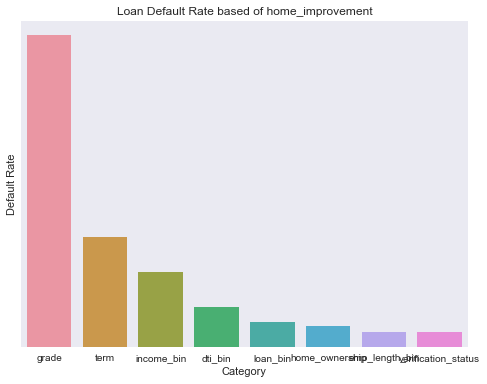

In [43]:
home_improvement = loan_final[loan_final['purpose'] == 'home_improvement']

home_improvement_default_rate = {}

for i in category_list:
    weighted_average = find_categorical_weighted_average(home_improvement,i)
    home_improvement_default_rate[i] =  weighted_average
    
home_improvement_default_rate_df = pd.DataFrame.from_dict(home_improvement_default_rate,orient="index",columns=["rate"]).reset_index()
home_improvement_default_rate_df.sort_values(by='rate',ascending=False,inplace=True)
home_improvement_default_rate_df.columns=['Category','Default Rate']

plot_bar(home_improvement_default_rate_df,"home_improvement")

Home Improvement Loan - Important Variables:
    1. Grade
    2. Term
    3. Annual Income Bin
    4. DTI Bin

In [44]:
### Major Purchase Default Rate

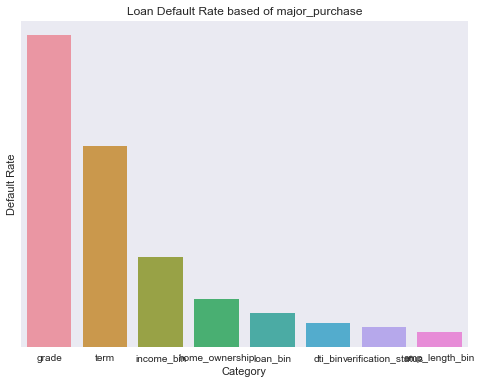

In [45]:
major_purchase = loan_final[loan_final['purpose'] == 'major_purchase']

major_purchase_default_rate = {}

for i in category_list:
    weighted_average = find_categorical_weighted_average(major_purchase,i)
    major_purchase_default_rate[i] =  weighted_average
    
major_purchase_default_rate_df = pd.DataFrame.from_dict(major_purchase_default_rate,orient="index",columns=["rate"]).reset_index()
major_purchase_default_rate_df.sort_values(by='rate',ascending=False,inplace=True)
major_purchase_default_rate_df.columns=['Category','Default Rate']

plot_bar(major_purchase_default_rate_df,"major_purchase")

Major Purchase Loan - Significant Risk Variables:
    1. Grade
    2. Term
    3. Annual Income Bin
    4. Home Ownership Bin

In [47]:
# Loading dataset so the plots can be done in Tableau for PPT

loan_final.to_csv("loan_final.csv")
loan_group.to_csv("loan_group.csv")
loan_group1.to_csv("loan_group1.csv")
credit_card_default_rate_df.to_csv("Credit Card.csv")
Other_default_rate_df.to_csv("Other.csv")
debt_consolidation_default_rate_df.to_csv("debt.csv")
home_improvement_default_rate_df.to_csv("Home.csv")
major_purchase_default_rate_df.to_csv("MJ.csv")